In [47]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

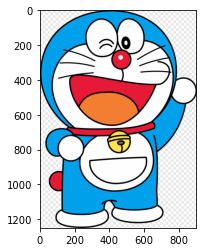

In [53]:
im = plt.imread("image.jpg")
plt.imshow(im)

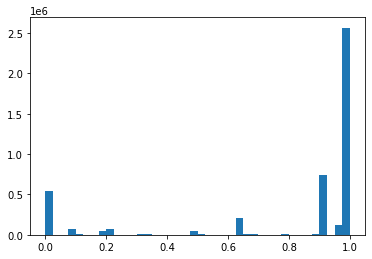

In [54]:
plt.hist(np.ravel(im), bins=40)
plt.show()

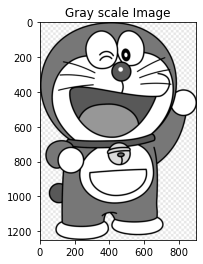

In [55]:
img = cv.imread("image.jpg",0)
plt.title("Gray scale Image")
plt.imshow(img,cmap="gray")

In [60]:
#finding threshold
oldThresh = img.mean()
while True:
    img2 = (img > oldThresh)*img
    img3 = (img <= oldThresh)*img
    mean1 = img2.mean()
    mean2 = img3.mean()
    newThresh = (mean1+mean2)/2
    diff = newThresh - oldThresh
    if(diff > 1e-4):
        oldThresh=newThresh
    else:
        cv.imwrite("image1.jpg",img2)
        cv.imwrite("image2.jpg",img3)
        break;

In [57]:
# truncate thresholding

r,c=img.shape
truncImg = np.zeros((r,c),np.uint8)
for i in range(r):
    for j in range(c):
        if(img[i,j]>oldThresh):
            truncImg[i,j]=oldThresh
        else:
            truncImg[i,j]=img[i,j]
            

# thresholding to 0 inverted            
zeroiInvImg = np.zeros((r,c),np.uint8)
for i in range(r):
    for j in range(c):
        if(img[i,j]>oldThresh):
            zeroiInvImg[i,j]=0
        else:
            zeroiInvImg[i,j]=img[i,j]
            
# inverted binary thresholding
invBinImg = np.zeros((r,c),np.uint8)
for i in range(r):
    for j in range(c):
        if(img[i,j]>oldThresh):
            invBinImg[i,j]=0
        else:
            invBinImg[i,j]=255
            
# binary thresholding
binImg = np.zeros((r,c),np.uint8)
for i in range(r):
    for j in range(c):
        if(img[i,j]>oldThresh):
            binImg[i,j]=255
        else:
            binImg[i,j]=0
            

# thresholding to 0           
zeroImg = np.zeros((r,c),np.uint8)
for i in range(r):
    for j in range(c):
        if(img[i,j]>oldThresh):
            zeroImg[i,j]=img[i,j]
        else:
            zeroImg[i,j]=0

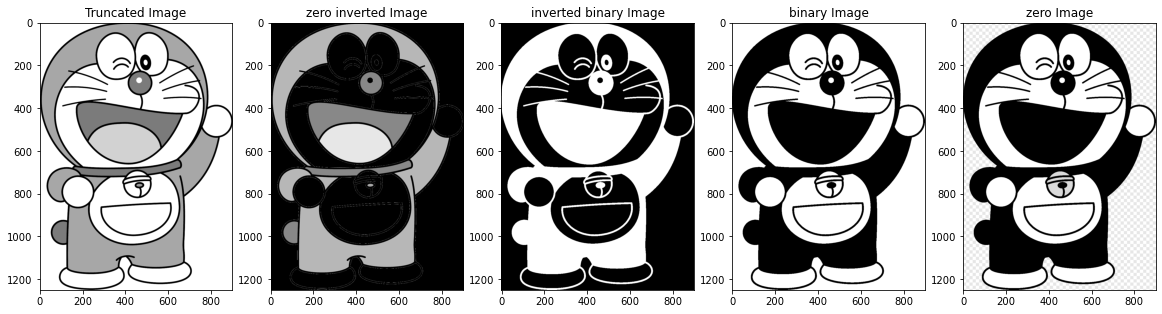

In [58]:
fig = plt.figure(figsize=(20,10))
plt.subplot(151)
plt.title("Truncated Image")
plt.imshow(truncImg,cmap="gray")

plt.subplot(152)
plt.title("zero inverted Image")
plt.imshow(zeroiInvImg,cmap="gray")

plt.subplot(153)
plt.title("inverted binary Image")
plt.imshow(invBinImg,cmap="gray")

plt.subplot(154)
plt.title("binary Image")
plt.imshow(binImg,cmap="gray")

plt.subplot(155)
plt.title("zero Image")
plt.imshow(zeroImg,cmap="gray")